# Regression Tree


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

In [6]:
trips_df = pd.read_pickle('../00_data/trips_hourly_selected.pkl')
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8418 entries, 2019-01-01 01:00:00 to 2019-12-31 23:00:00
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   starting_trips      8418 non-null   float64
 1   ongoing_trips_prev  8418 non-null   float64
 2   available_bikes     8418 non-null   float64
 3   min_temp            8418 non-null   float64
 4   hour                8418 non-null   int64  
 5   month               8418 non-null   int64  
 6   is_weekday          8418 non-null   bool   
 7   is_holiday          8418 non-null   bool   
dtypes: bool(2), float64(4), int64(2)
memory usage: 476.8 KB


# Try many features

In [8]:
Y = trips_df["starting_trips"]
X = trips_df.drop(["starting_trips"], axis=1)

In [9]:
X["is_weekday"] = X["is_weekday"].astype("int")
X["is_holiday"] = X["is_holiday"].astype("int")

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
tree_depth = 3

Tree_reg = DecisionTreeRegressor(max_depth=tree_depth, criterion="mse") # Other options: "mse", "friedman_mse", "mae"
#Tree_reg.fit(Xp.reshape((-1,1)), Yp)
Tree_reg.fit(X_train, Y_train)

/Users/julia/venv/magma/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=3)

In [12]:
structure = Tree_reg.tree_

In [13]:
n_leafs = structure.n_leaves
n_nodes = structure.node_count
children_left = structure.children_left
children_right = structure.children_right
feature = structure.feature

In [14]:
print("Num nodes: \t",n_nodes)
print("Num leaves: \t",n_leafs)
print("left children per node: ", children_left)
print("right children per node: ", children_right)
print("Decision feature at node: ", feature)


Num nodes: 	 15
Num leaves: 	 8
left children per node:  [ 1  2  3 -1 -1  6 -1 -1  9 10 -1 -1 13 -1 -1]
right children per node:  [ 8  5  4 -1 -1  7 -1 -1 12 11 -1 -1 14 -1 -1]
Decision feature at node:  [ 0  3  3 -2 -2  3 -2 -2  3  3 -2 -2  3 -2 -2]


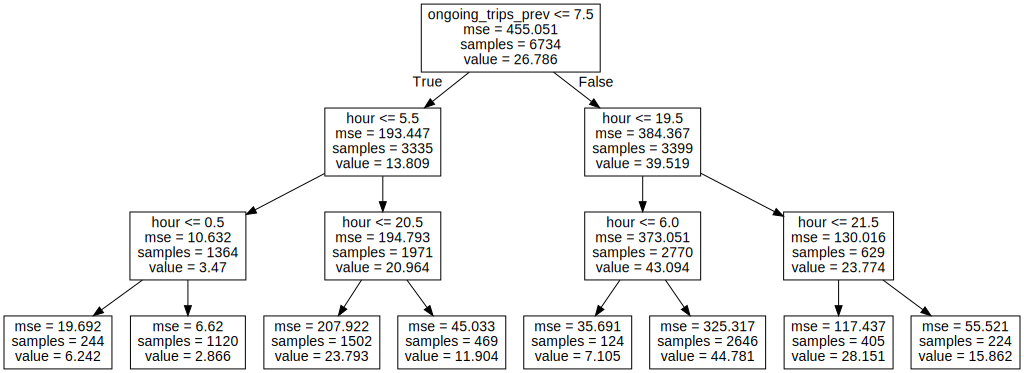

In [17]:
dot_data = export_graphviz(Tree_reg, feature_names=['ongoing_trips_prev','available_bikes','min_temp','hour','month','is_weekday','is_holiday'])
#dot_data = export_graphviz(Tree_reg)
graph = graphviz.Source(dot_data)
graph

In [65]:
# mehr insights in notebook TODO
# node_indicator = Tree_reg.decision_path(X)


# Try 1 feature for visualisation

In [18]:
Xp = trips_df.index.values
Yp = trips_df["starting_trips"].values

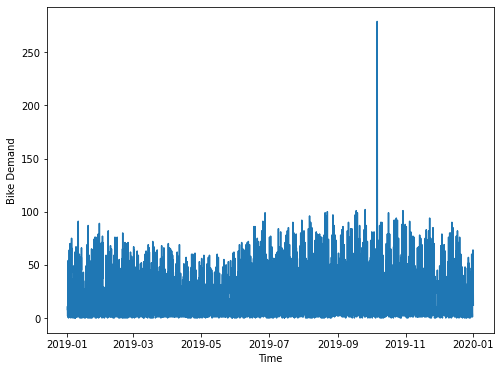

In [19]:
plt.figure(figsize = (8,6))
plt.plot(Xp, Yp)
plt.xlabel("Time")
plt.ylabel("Bike Demand")
plt.show()

In [20]:
def plot_tree_regression_line(tree_depth):

    # Fit regression model (to full data)
    Tree_reg = DecisionTreeRegressor(max_depth=tree_depth,
                                    criterion="mse") # Other options: "mse", "friedman_mse", "mae"
    Tree_reg.fit(Xp.reshape((-1,1)), Yp)
    Y_pred = Tree_reg.predict(Xp.reshape((-1,1)))

    attributes = Tree_reg.tree_

    # plot
    plt.figure(figsize = (8,6))
    plt.scatter(Xp, Yp, marker="x")
    plt.plot(Xp, Tree_reg.predict(Xp.reshape((-1,1))), marker="x", color='C1')
    plt.xlabel("Time", fontsize=16)
    plt.ylabel("Bike Demand", fontsize=16)

    print("number of nodes: ", attributes.node_count)
    print("number of leafs: ", attributes.n_leaves)
    print("R^2: ", r2_score(Yp, Y_pred))


    #plt.savefig("Peak_Power_Regression_Lines_{}depth.pdf".format(tree_depth))

number of nodes:  127
number of leafs:  64
R^2:  0.155949882149782


/Users/julia/venv/magma/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


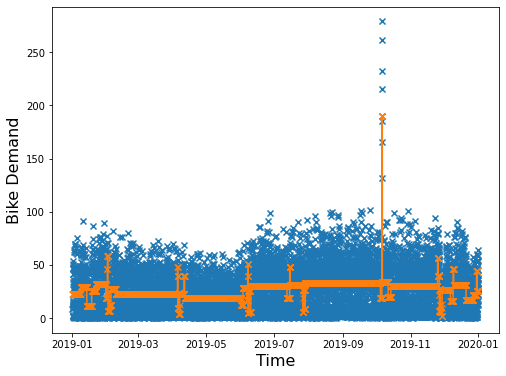

In [21]:
plot_tree_regression_line(6)

In [22]:
def plot_regression_tree_sklearn(tree_depth):

    # Fit regression model (to full data)
    model = DecisionTreeRegressor(max_depth=tree_depth)
    model.fit(Xp.reshape((-1,1)), Yp)

    dot_data = export_graphviz(model,
                              feature_names=["Time"])

    graph = graphviz.Source(dot_data)

    return graph

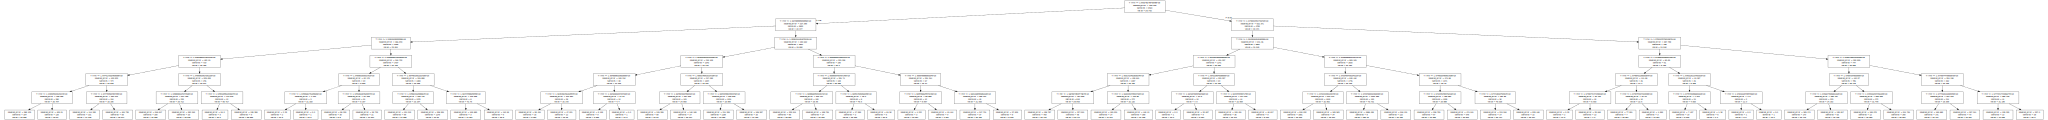

In [23]:
plot_regression_tree_sklearn(6)